Load past three years worth of data for Netflix stock from https://finance.yahoo.com/quote/NFLX/history?p=NFLX
and download the CSV file.

In [ ]:
import pandas as pd
stock_data = pd.read_csv('./NFLX.csv',index_col='Date')
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-04,359.720001,362.250000,348.040009,351.040009,351.040009,7487000
2019-03-05,351.459991,356.170013,348.250000,354.299988,354.299988,5937800
2019-03-06,353.600006,359.880005,351.700012,359.609985,359.609985,6211900
2019-03-07,360.160004,362.859985,350.500000,352.600006,352.600006,6151300
2019-03-08,345.750000,349.920013,342.470001,349.600006,349.600006,6898800


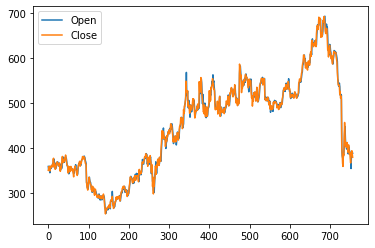

In [ ]:
stock_data[['Open', 'Close']].plot()

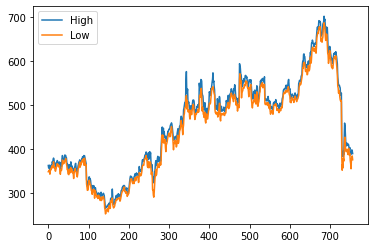

In [ ]:
stock_data[['High', 'Low']].plot()

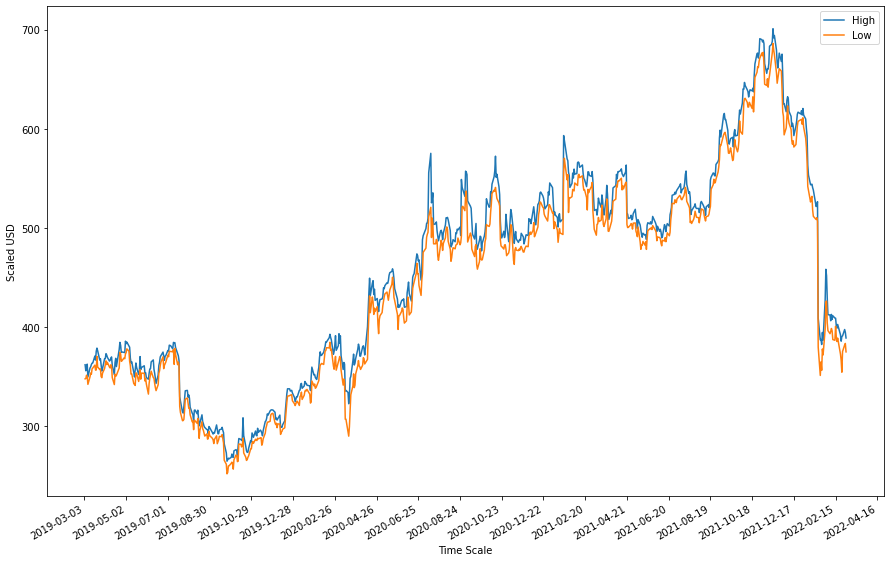

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in stock_data.index.values]

plt.plot(x_dates, stock_data['High'], label='High')
plt.plot(x_dates, stock_data['Low'], label='Low')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [ ]:
target_y = stock_data['Close']
X_feat = stock_data.iloc[:,0:3]
stock_data = stock_data[['Open', 'High', 'Low', 'Close']]

In [ ]:
#Feature Scaling
sc = StandardScaler()
stock_data_ft = sc.fit_transform(stock_data.values)
stock_data_ft = pd.DataFrame(columns=stock_data.columns,
                            data=stock_data_ft, 
                            index=stock_data.index)

### Using n day lag

In [ ]:
def lstm_split(data, n_steps):
  X, y = [], []
  for i in range(len(data)-n_steps):
    X.append(data[i:i + n_steps, :-1])
    y.append(data[i + n_steps-1, -1])

  return np.array(X), np.array(y)

In [ ]:
n_steps=10
X1, y1 = lstm_split(stock_data_ft.values, n_steps=n_steps)

train_split=0.8
split_idx = int(np.ceil(len(X1)*train_split))
date_index = stock_data_ft.index

X_train, X_test = X1[:split_idx], X1[split_idx:]
y_train, y_test = y1[:split_idx], y1[split_idx:]
X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:-n_steps]

print(X1.shape, X_train.shape, X_test.shape, X_test_date.shape, y_test.shape)

(747, 10, 3) (598, 10, 3) (149, 10, 3) (149,) (149,)


In [ ]:
lstm = Sequential()
lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), 
              activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu'))

lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 10, 50)            10800     
                                                                 
 lstm_12 (LSTM)              (None, 10, 50)            20200     
                                                                 
 lstm_13 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 51,251
Trainable params: 51,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=lstm.fit(X_train, y_train, 
                 epochs=100, batch_size=4, 
                 verbose=2, shuffle=False)

Epoch 1/100
150/150 - 6s - loss: 0.1171 - 6s/epoch - 42ms/step
Epoch 2/100
150/150 - 2s - loss: 0.0591 - 2s/epoch - 14ms/step
Epoch 3/100
150/150 - 2s - loss: 0.0399 - 2s/epoch - 14ms/step
Epoch 4/100
150/150 - 2s - loss: 0.0375 - 2s/epoch - 13ms/step
Epoch 5/100
150/150 - 2s - loss: 0.0370 - 2s/epoch - 13ms/step
Epoch 6/100
150/150 - 2s - loss: 0.0372 - 2s/epoch - 14ms/step
Epoch 7/100
150/150 - 2s - loss: 0.0332 - 2s/epoch - 14ms/step
Epoch 8/100
150/150 - 2s - loss: 0.0312 - 2s/epoch - 13ms/step
Epoch 9/100
150/150 - 2s - loss: 0.0310 - 2s/epoch - 13ms/step
Epoch 10/100
150/150 - 2s - loss: 0.0299 - 2s/epoch - 13ms/step
Epoch 11/100
150/150 - 2s - loss: 0.0284 - 2s/epoch - 13ms/step
Epoch 12/100
150/150 - 2s - loss: 0.0271 - 2s/epoch - 13ms/step
Epoch 13/100
150/150 - 2s - loss: 0.0299 - 2s/epoch - 13ms/step
Epoch 14/100
150/150 - 2s - loss: 0.0270 - 2s/epoch - 13ms/step
Epoch 15/100
150/150 - 2s - loss: 0.0239 - 2s/epoch - 13ms/step
Epoch 16/100
150/150 - 2s - loss: 0.0207 - 2s/epo

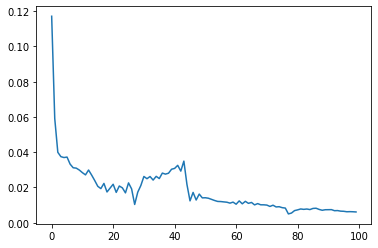

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
y_pred = lstm.predict(X_test)
y_pred = y_pred.squeeze()

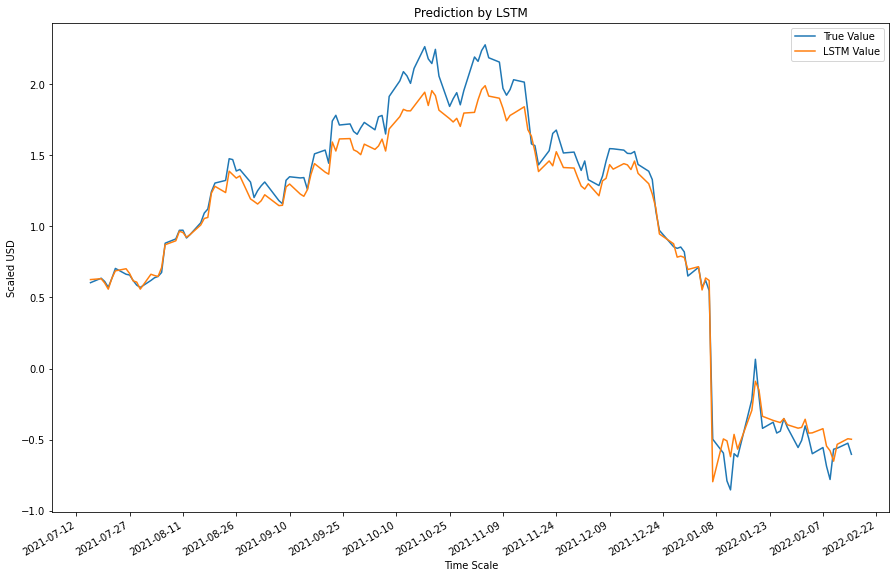

In [ ]:
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in X_test_date.values]

plt.plot(x_dates, y_test, label='True Value')
plt.plot(x_dates, y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RMSE: ",rmse)
print("MAPE: ", mape)

RSME:  0.13703166803235142
MAPE:  0.10188252415066049


### Comparison with SMA and EMA

#### SMA

Test RMSE: 98.507
Test MAPE: 0.159


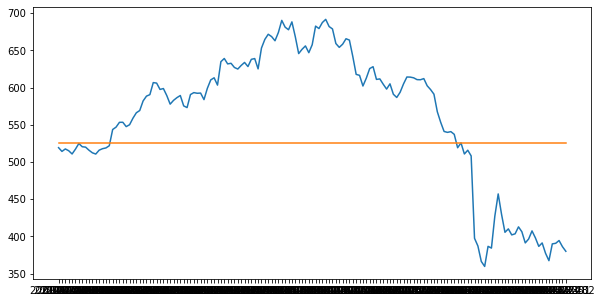

In [ ]:
train_split = 0.8
split_idx = int(np.ceil(len(stock_data)*train_split))
train = stock_data[['Close']].iloc[:split_idx]
test = stock_data[['Close']].iloc[split_idx:]

test_pred = np.array([train.rolling(10).mean().iloc[-1]]*len(test)).reshape((-1,1))

print('Test RMSE: %.3f' % mean_squared_error(test, test_pred, squared=False))
print('Test MAPE: %.3f' % mean_absolute_percentage_error(test, test_pred))

plt.figure(figsize=(10,5))
plt.plot(test)
plt.plot(test_pred)
plt.show()

#### EMA

Test RMSE: 99.268
Test MAPE: 0.160


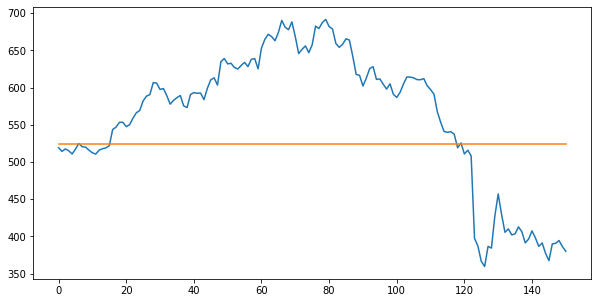

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

X = stock_data[['Close']].values
train_split = 0.8
split_idx = int(np.ceil(len(X)*train_split))
train = X[:split_idx]
test = X[split_idx:]
test_concat = np.array([]).reshape((0,1))

for i in range(len(test)):
  train_fit = np.concatenate((train, np.asarray(test_concat)))
  fit = SimpleExpSmoothing(np.asarray(train_fit)).fit(smoothing_level=0.1)
  test_pred = fit.forecast(1)
  test_concat = np.concatenate((np.asarray(test_concat), test_pred.reshape((-1,1))))
  
print('Test RMSE: %.3f' % mean_squared_error(test, test_concat, squared=False))
print('Test MAPE: %.3f' % mean_absolute_percentage_error(test, test_concat))

plt.figure(figsize=(10,5))
plt.plot(test)
plt.plot(test_concat)
plt.show()

#### A different averaging

Test RMSE: 12.669
Test MAPE: 0.019


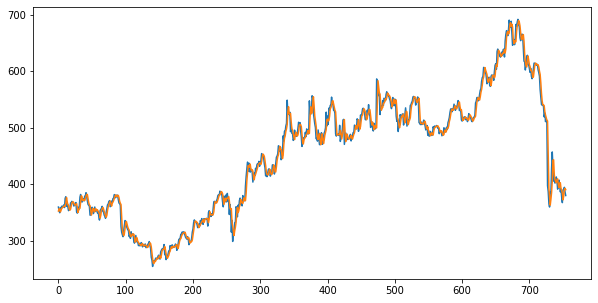

In [ ]:
X = stock_data[['Close']].values
time_steps = 2

history = [X[i] for i in range(time_steps)]
ytest = [X[i] for i in range(time_steps, len(X))]
ypred_list = []

for t in range(len(ytest)):
	ypred = np.mean([history[i] for i in range(len(history)-time_steps,len(history))])
	ypred_list.append(ypred)
	history.append(ytest[t])

print('Test RMSE: %.3f' % mean_squared_error(ytest, ypred_list, squared=False))
print('Test MAPE: %.3f' % mean_absolute_percentage_error(ytest, ypred_list))

plt.figure(figsize=(10,5))
plt.plot(ytest)
plt.plot(ypred_list)
plt.show()